In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot 
import re
import difflib 
from pandas.api.types import is_numeric_dtype

In [27]:
dataframe = pd.read_csv('dataset1_dirty.csv',names = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","salary"]);

listOfWorkClass = ["Private", "Self-emp-not-inc", "Self-emp-inc", "Federal-gov", "Local-gov", "State-gov", "Without-pay", "Never-worked"]

listOfOccupation = ["Tech-support", "Craft-repair", "Other-service", "Sales", "Exec-managerial", "Prof-specialty", "Handlers-cleaners",
"Machine-op-inspct", "Adm-clerical", "Farming-fishing", "Transport-moving", "Priv-house-serv", "Protective-serv",
"Armed-Forces"]


In [28]:
def cleanAge():
    
    #   Converting negative to positive using abs()
    dataframe['age'] = dataframe['age'].abs()
    
    #   replacing the 0s with NaN in order to use pandas fillna method
    dataframe['age'] = dataframe['age'].replace({0:np.nan})
    
    #   fill the NaN values with Mean value of the Age column
    meanAge = dataframe['age'].mean(skipna=True)
    meanAge = int(meanAge)
    dataframe['age'].fillna(meanAge, inplace=True)
    dataframe['age']=dataframe['age'].astype(int)

cleanAge()

In [29]:
# This method will first remove the special characters and lower the alphabets from the originalList of values in a column and
# create a new list.Then it will do the same for dirty data in a dataset. It will compare for the exact match in the list first
# if it is a exact match, it will get the index and fetch the category from originalList. Otherwise it will use difflib to compare 
# the distance between the strings. Afterwards it will replace the 

def cleanCategoricalData(originalList,columnName):
    
    modifiedList =[]
    
    for j in range(len(originalList)):   
            modifiedstr=originalList[j].lower()
            modifiedstr = re.sub(r'\W+', '', modifiedstr)
            modifiedList.append(modifiedstr)
            
    dataframe[columnName].replace({'?':np.nan},inplace=True)
    dataframe[columnName].isnull().sum()
    dataframe.dropna(inplace=True)
    dataframe.reset_index(drop=True, inplace=True)
    tempDataframe = dataframe[columnName]

    for i in range(len(tempDataframe)):    
        modifiedRowValue = re.sub(r'\W+', '', tempDataframe[i])
        modifiedRowValue=modifiedRowValue.lower()
        tempDataframe.replace({tempDataframe[i]:modifiedRowValue},inplace=True)
        
    for i in range(len(tempDataframe)):
        for j in range(len(originalList)):
            if(tempDataframe[i] == modifiedList[j]):
                tempDataframe.replace({tempDataframe[i]:originalList[j]},inplace=True)
                break
            elif((difflib.SequenceMatcher(None,tempDataframe[i],modifiedList[j]).ratio()) >= 0.87):
                tempDataframe.replace({tempDataframe[i]:originalList[j]},inplace=True)
                break
                
    for i in range(len(tempDataframe)):
        if(tempDataframe[i] not in originalList):
            tempDataframe.replace({tempDataframe[i]:'?'},inplace=True)
    
    tempDataframe.replace({'?':np.nan},inplace=True)
    dataframe[columnName]=tempDataframe
    dataframe.dropna(inplace=True)
    dataframe.reset_index(drop=True, inplace=True)

cleanCategoricalData(originalList=listOfWorkClass,columnName="workclass")
cleanCategoricalData(originalList=listOfOccupation,columnName="occupation")


In [34]:
# This method will print the data in the format given in a requirement document
# according to the type of the data in a column

def printData():
    
    dataframes = list(dataframe.columns.values)
    print("Rows : " + str(dataframe['age'].count()))
    
    for columnName in dataframes:
                
        if(is_numeric_dtype(dataframe[columnName])):
            print(columnName + ": Min. : " + str(dataframe[columnName].min()) + ", Mean : "+ str(round(dataframe[columnName].mean(),2)) + ", Max. : " + str(dataframe[columnName].max()) + ", Std. : " + str(round(dataframe[columnName].std(),2)))
            print("\n")  
                
        else:
            uniqueValueCount = len(dataframe[columnName].unique().tolist())
            print(columnName + " : " + str(uniqueValueCount))
            print(dataframe[columnName].value_counts())
            print("\n") 
            
printData()

Rows : 28954
age: Min. : 17, Mean : 38.44, Max. : 90, Std. : 13.06


workclass : 7
Private             21393
Self-emp-not-inc     2403
Local-gov            1983
State-gov            1222
Self-emp-inc         1034
Federal-gov           906
Without-pay            13
Name: workclass, dtype: int64


fnlwgt: Min. : 13769, Mean : 189723.55, Max. : 1484705, Std. : 105623.91


education : 16
HS-grad         9456
Some-college    6399
Bachelors       4857
Masters         1559
Assoc-voc       1257
11th             996
Assoc-acdm       962
10th             794
7th-8th          531
Prof-school      517
9th              440
Doctorate        364
12th             361
5th-6th          276
1st-4th          141
Preschool         44
Name: education, dtype: int64


education-num: Min. : 1, Mean : 10.12, Max. : 16, Std. : 2.55


marital-status : 7
Married-civ-spouse       13469
Never-married             9330
Divorced                  4068
Separated                  903
Widowed                    805
Married

In [31]:
# converting dataframe to csv file with ignoring index column and header rowm of the dataframe 
# by default to__csv has w mode which overwrites the generated file everytime

dataframe.to_csv('dataset1_processed.csv', header=False,index=False)


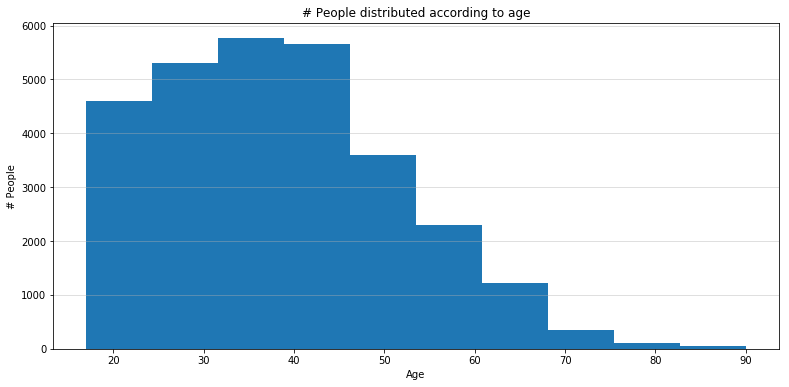

In [51]:
# gca() returns the current axes

plotSize = plot.figure(figsize = (13,6))
axes = plotSize.gca()
dataframe['age'].plot.hist(ax=axes)
plot.title('# People distributed according to age')
plot.xlabel('Age')
plot.ylabel('# People')
plot.grid(axis='y', alpha=0.5)

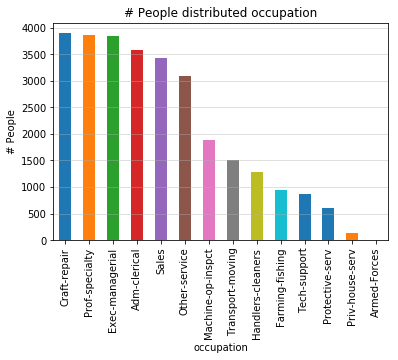

In [53]:

dataframe['occupation'].value_counts().plot(kind='bar')
plot.title('# People distributed occupation')
plot.xlabel('occupation')
plot.ylabel('# People')
plot.grid(axis='y', alpha=0.5)